## Tarea Clase 18: Valuación Opciones Europeas PUT

### Alumno: Esteban Navarrete Garrido

In [3]:
#importar los paquetes que se van a usar
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import datetime
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
%matplotlib inline
#algunas opciones para Pandas
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 3)

In [4]:
aapl = web.YahooOptions('AAPL')
aapl_opt = aapl.get_all_data().reset_index()
aapl_opt.set_index('Expiry').sort_index()

,Strike,Type,Symbol,...,Quote_Time,Last_Trade_Date,JSON
Expiry,,,,,,,
2018-04-20,2.5,call,AAPL180420C00002500,...,2018-04-16 23:59:25,2017-11-28 16:24:01,"{'contractSymbol': 'AAPL180420C00002500', 'str..."
2018-04-20,100.0,put,AAPL180420P00100000,...,2018-04-16 23:59:25,2018-03-09 18:37:28,"{'contractSymbol': 'AAPL180420P00100000', 'str..."
2018-04-20,100.0,call,AAPL180420C00100000,...,2018-04-16 23:59:25,2018-04-13 13:40:48,"{'contractSymbol': 'AAPL180420C00100000', 'str..."
2018-04-20,172.5,call,AAPL180420C00172500,...,2018-04-16 23:59:25,2018-04-16 19:59:55,"{'contractSymbol': 'AAPL180420C00172500', 'str..."
2018-04-20,172.5,put,AAPL180420P00172500,...,2018-04-16 23:59:25,2018-04-16 19:59:55,"{'contractSymbol': 'AAPL180420P00172500', 'str..."
...,...,...,...,...,...,...,...
2020-06-19,185.0,put,AAPL200619P00185000,...,2018-04-16 23:59:25,2018-04-12 18:01:47,"{'contractSymbol': 'AAPL200619P00185000', 'str..."
2020-06-19,185.0,call,AAPL200619C00185000,...,2018-04-16 23:59:25,2018-04-16 13:52:58,"{'contractSymbol': 'AAPL200619C00185000', 'str..."
2020-06-19,105.0,put,AAPL200619P00105000,...,2018-04-16 23:59:25,2018-03-24 03:50:01,"{'contractSymbol': 'AAPL200619P00105000', 'str..."


In [5]:
def get_historical_closes(ticker, start_date, end_date=None):
    closes = web.YahooDailyReader(ticker, start_date, end_date).read().sort_index('major_axis')
#     closes = web.YahooDailyReader(symbols=ticker, start=start_date, end=end_date).read()
#     index = pd.to_datetime(closes.loc['date',:,tickers[0]].values)
#     closes.set_axis(index, axis=1, inplace=True)
#     closes = closes.loc['adjclose']#.sort_index().dropna()
#     closes = pd.DataFrame(np.array(closes.as_matrix(), dtype=np.float64), columns=ticker, index=closes.index)
#     closes.index.name = 'Date'
    return closes.loc['Adj Close'].dropna()

In [9]:
# ticker = ['AAPL']
ticker = ['AAPL','MSFT', 'AEROMEX.MX']
start_date = '2017-01-01'

closes = get_historical_closes(ticker, start_date)
closes_appl = closes.loc[:,'AAPL']
# assets_mx = get_historical_closes(ticker_mx, start_date_mx)
# closes_appl = get_historical_closes(['AAPL'], '2017-01-01')
# closes_appl.plot(figsize=(8,8))
#closes_appl.plot(figsize=(8,8));

/anaconda3/lib/python3.6/site-packages/pandas/core/panel.py:728: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  result = self.reindex_axis(new_ax, axis=axis)


In [49]:
def calc_daily_ret(closes):
    return np.log(closes/closes.shift(1)).iloc[1:]

In [50]:
ret_aapl = calc_daily_ret(closes_appl)

## Valuación Prima PUT más de 200 días- Usando simulación: Modelo normal para los rendimientos

In [51]:
mu = ret_aapl.mean()
sigma = ret_aapl.std()
mu, sigma

(0.0013929492875701997, 0.012410495949063021)

In [52]:
aapl_opt.loc[(aapl_opt.Type=='put') & (aapl_opt.Strike==180) & (aapl_opt.Expiry=='2018-11-16')]

,Strike,Expiry,Type,...,Quote_Time,Last_Trade_Date,JSON
695,180.0,2018-11-16,put,...,2018-04-16 23:59:25,2018-04-16 18:21:11,"{'contractSymbol': 'AAPL181116P00180000', 'str..."


In [53]:
aapl_opt.loc[691,'JSON']

{'contractSymbol': 'AAPL180921P00180000',
 'strike': 180.0,
 'currency': 'USD',
 'lastPrice': 12.47,
 'change': -0.6300001,
 'percentChange': -4.8091607,
 'volume': 89,
 'openInterest': 3768,
 'bid': 12.5,
 'ask': 12.7,
 'contractSize': 'REGULAR',
 'expiration': 1537488000,
 'lastTradeDate': 1523905545,
 'impliedVolatility': 0.22467816345214842,
 'inTheMoney': True}

In [54]:
# Tasa de bonos de 1 yr de fecha 04/16/18 -> 2.12%
r = 0.0212/360 # Tasa diaria

In [55]:
ndays = 214
nscen = 10
dates = pd.date_range('2018-04-16', periods = ndays)
dates

DatetimeIndex(['2018-04-16', '2018-04-17', '2018-04-18', '2018-04-19',
               '2018-04-20', '2018-04-21', '2018-04-22', '2018-04-23',
               '2018-04-24', '2018-04-25',
               ...
               '2018-11-06', '2018-11-07', '2018-11-08', '2018-11-09',
               '2018-11-10', '2018-11-11', '2018-11-12', '2018-11-13',
               '2018-11-14', '2018-11-15'],
              dtype='datetime64[ns]', length=214, freq='D')

In [56]:
sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r, index=dates)

In [57]:
S0 = closes_appl.iloc[-1]  # Condición inicial del precio a simular
sim_closes = S0*np.exp(sim_ret.cumsum())
sim_closes

,0,1,2,...,7,8,9
2018-04-16,175.772,177.727,177.300,...,179.619,173.618,176.059
2018-04-17,175.031,181.602,171.622,...,180.117,176.916,173.266
2018-04-18,175.416,180.610,171.466,...,183.015,180.152,172.548
2018-04-19,174.308,177.828,172.021,...,183.755,181.686,171.904
2018-04-20,176.190,181.164,172.268,...,181.114,181.407,170.762
...,...,...,...,...,...,...,...
2018-11-11,143.457,198.398,183.674,...,139.144,184.747,186.096
2018-11-12,143.278,199.646,183.465,...,139.582,187.424,185.228
2018-11-13,143.740,201.111,185.648,...,142.354,185.744,185.514
2018-11-14,147.193,198.747,183.604,...,142.567,190.012,183.233


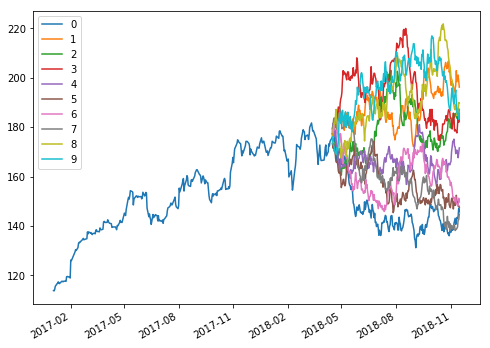

In [58]:
# Se muestran los precios simulados con los precios descargados
pd.concat([closes_appl,sim_closes]).plot(figsize=(8,6));

In [59]:
K=180  # strike price
ndays = 214 
nscen = 100000
dates = pd.date_range('2018-04-16', periods = ndays)
S0 = closes_appl.iloc[-1]  # Condición inicial del precio a simular

sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r,index=dates)
sim_closes = S0*np.exp(sim_ret.cumsum())

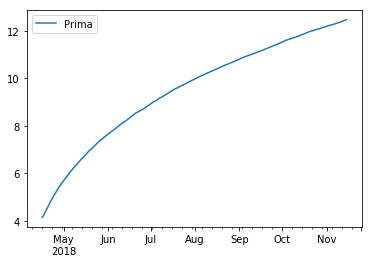

In [60]:
strike = pd.DataFrame(K*np.ones([ndays,nscen]), index=dates)
put = pd.DataFrame({'Prima':np.exp(-r*ndays) \
              *np.fmax(strike-sim_closes,np.zeros([ndays,nscen])).T.mean()}, index=dates)
put.plot();

In [61]:
put.iloc[-1]

Prima    12.469
Name: 2018-11-15 00:00:00, dtype: float64

In [62]:
confianza = 0.95
sigma_est = sim_closes.iloc[-1].sem()
mean_est = put.iloc[-1].Prima
i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i1)
print(i2)

(12.262482048467485, 12.67469787373838)
(12.262484543149348, 12.674695379056516)


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


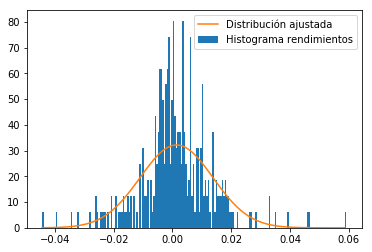

In [63]:
ren = calc_daily_ret(closes_appl) # rendimientos 
y,x,discar = plt.hist(ren,200,normed=True,label='Histograma rendimientos')
mu_fit,sd_fit = st.norm.fit(ren) # Se ajustan los parámetros de una normal

# Valores máximo y mínimo de los rendiemientos a generar
ren_max = max(x);ren_min = min(x)
# Vector de rendimientos generados
ren_gen = np.arange(ren_min,ren_max,0.001)
# Generación de la normal ajustado con los parámetros encontrados
curve_fit = st.norm.pdf(ren_gen,loc=mu_fit,scale=sd_fit)
plt.plot(ren_gen,curve_fit,label='Distribución ajustada')
plt.legend()
plt.show()

## Valuación PUT 200 días usando simulación: uso del histograma de rendimientos

In [64]:
ndays = 214 
nscen = 10

In [65]:
prob = y/np.sum(y)
values = x[1:]

In [66]:
ret = np.random.choice(values, ndays*nscen, p=prob)
dates = pd.date_range('2018-04-16',periods=ndays)
sim_ret_hist = pd.DataFrame(ret.reshape((ndays,nscen)),index=dates)
sim_ret_hist

,0,1,2,...,7,8,9
2018-04-16,1.001e-02,-0.002,6.381e-03,...,1.725e-02,-0.003,0.014
2018-04-17,-1.385e-03,0.006,-1.744e-02,...,5.346e-03,0.004,-0.007
2018-04-18,-3.974e-03,-0.014,4.677e-02,...,-1.433e-02,-0.003,-0.002
2018-04-19,6.860e-04,0.012,-6.563e-03,...,-5.009e-03,-0.006,-0.001
2018-04-20,3.793e-03,0.011,1.682e-04,...,-2.938e-03,0.004,0.013
...,...,...,...,...,...,...,...
2018-11-11,2.239e-03,0.003,1.725e-02,...,8.970e-03,0.004,0.005
2018-11-12,1.682e-04,0.003,-8.673e-04,...,-8.673e-04,-0.010,-0.017
2018-11-13,-4.492e-03,0.018,4.828e-03,...,-8.673e-04,0.003,0.003
2018-11-14,1.682e-04,-0.010,-2.054e-02,...,1.204e-03,0.001,-0.016


In [43]:
sim_closes_hist = (closes_appl.iloc[-1])*np.exp(sim_ret_hist.cumsum())
sim_closes_hist

,0,1,2,...,7,8,9
2018-04-16,173.588,178.418,175.850,...,178.973,176.305,176.488
2018-04-17,176.061,179.746,176.153,...,181.147,176.153,178.355
2018-04-18,176.456,180.896,174.729,...,180.990,173.197,175.636
2018-04-19,175.574,176.394,174.216,...,180.179,177.127,176.394
2018-04-20,177.616,177.432,173.345,...,179.930,175.695,177.065
...,...,...,...,...,...,...,...
2018-11-11,247.986,219.122,197.873,...,249.790,187.792,316.638
2018-11-12,250.221,220.296,201.735,...,250.740,187.144,321.482
2018-11-13,251.692,217.050,200.831,...,257.492,187.175,323.708
2018-11-14,250.694,219.346,200.138,...,257.669,190.039,321.924


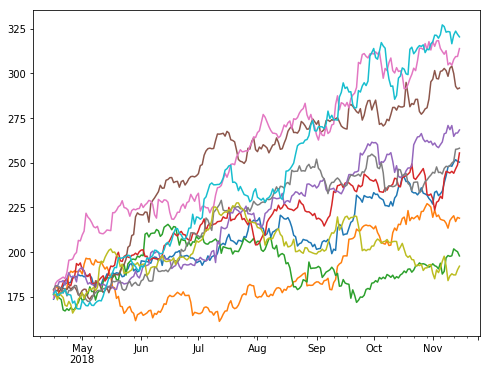

In [44]:
sim_closes_hist.plot(figsize=(8,6),legend=False);

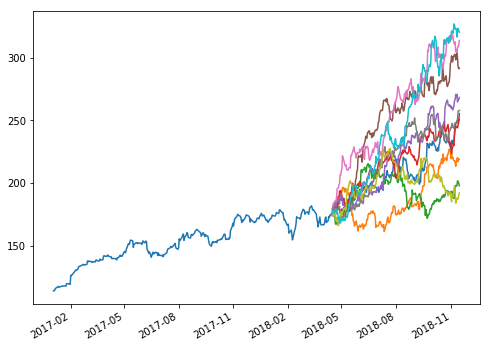

In [45]:
pd.concat([closes_appl,sim_closes_hist]).plot(figsize=(8,6),legend=False);

In [84]:
K=180
ndays = 214
nscen = 10000
freq, values = np.histogram(ret_aapl+r-mu, bins=2000)
prob = freq/np.sum(freq)
ret=np.random.choice(values[1:],ndays*nscen,p=prob)
dates=pd.date_range('2018-04-16',periods=ndays)
sim_ret_hist = pd.DataFrame(ret.reshape((ndays,nscen)),index=dates)
sim_closes_hist = (closes_appl.iloc[-1])*np.exp(sim_ret_hist.cumsum())

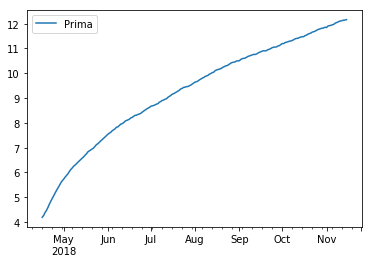

In [85]:
strike = pd.DataFrame(K*np.ones(ndays*nscen).reshape((ndays,nscen)), index=dates)
put_hist = pd.DataFrame({'Prima':np.exp(-r*ndays)*np.fmax(strike-sim_closes_hist,np.zeros(ndays*nscen).reshape((ndays,nscen))).T.mean()}, index=dates)
put_hist.plot();

In [86]:
put_hist.iloc[-1]

Prima    12.162
Name: 2018-11-15 00:00:00, dtype: float64

In [87]:
confianza = 0.95
sigma_est = sim_closes_hist.iloc[-1].sem()
mean_est = put_hist.iloc[-1].Prima
i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i1)
print(i1)

(11.50542748084771, 12.818542641272677)
(11.50542748084771, 12.818542641272677)


## Valuación Prima PUT menos de 100 días- Usando simulación: Modelo normal para los rendimientos

In [88]:
mu = ret_aapl.mean()
sigma = ret_aapl.std()
mu, sigma

(0.0013929492875701997, 0.012410495949063021)

In [95]:
aapl_opt.loc[(aapl_opt.Type=='put') & (aapl_opt.Strike==180) & (aapl_opt.Expiry=='2018-07-20')]

,Strike,Expiry,Type,...,Quote_Time,Last_Trade_Date,JSON
687,180.0,2018-07-20,put,...,2018-04-16 23:59:25,2018-04-16 19:57:05,"{'contractSymbol': 'AAPL180720P00180000', 'str..."


In [96]:
aapl_opt.loc[687,'JSON']

{'contractSymbol': 'AAPL180720P00180000',
 'strike': 180.0,
 'currency': 'USD',
 'lastPrice': 9.85,
 'change': -1.3499994,
 'percentChange': -12.053566,
 'volume': 81,
 'openInterest': 3351,
 'bid': 9.85,
 'ask': 10.0,
 'contractSize': 'REGULAR',
 'expiration': 1532044800,
 'lastTradeDate': 1523908625,
 'impliedVolatility': 0.2136919451904297,
 'inTheMoney': True}

In [97]:
# Tasa de bonos de 1 yr de fecha 04/16/18 -> 2.12%
r = 0.0212/360 # Tasa diaria

In [98]:
K=180  # strike price
ndays = 95 
nscen = 100000
dates = pd.date_range('2018-04-16', periods = ndays)
S0 = closes_appl.iloc[-1]  # Condición inicial del precio a simular

sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r,index=dates)
sim_closes = S0*np.exp(sim_ret.cumsum())

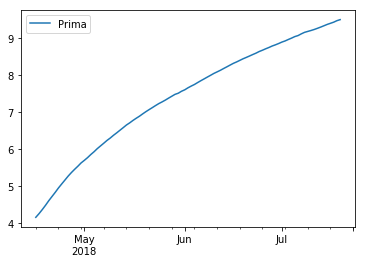

In [99]:
strike = pd.DataFrame(K*np.ones([ndays,nscen]), index=dates)
put = pd.DataFrame({'Prima':np.exp(-r*ndays) \
              *np.fmax(strike-sim_closes,np.zeros([ndays,nscen])).T.mean()}, index=dates)
put.plot();

In [100]:
put.iloc[-1]

Prima    9.487
Name: 2018-07-19 00:00:00, dtype: float64

In [101]:
confianza = 0.95
sigma_est = sim_closes.iloc[-1].sem()
mean_est = put.iloc[-1].Prima
i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i1)
print(i2)

(9.352849788690362, 9.621451165264753)
(9.352851414234413, 9.621449539720702)


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


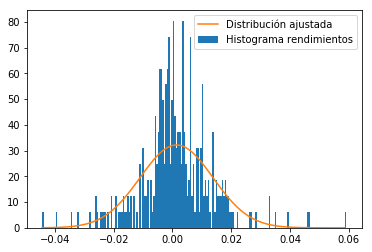

In [102]:
ren = calc_daily_ret(closes_appl) # rendimientos 
y,x,discar = plt.hist(ren,200,normed=True,label='Histograma rendimientos')
mu_fit,sd_fit = st.norm.fit(ren) # Se ajustan los parámetros de una normal

# Valores máximo y mínimo de los rendiemientos a generar
ren_max = max(x);ren_min = min(x)
# Vector de rendimientos generados
ren_gen = np.arange(ren_min,ren_max,0.001)
# Generación de la normal ajustado con los parámetros encontrados
curve_fit = st.norm.pdf(ren_gen,loc=mu_fit,scale=sd_fit)
plt.plot(ren_gen,curve_fit,label='Distribución ajustada')
plt.legend()
plt.show()

## Valuación PUT menos 100 días usando simulación: uso del histograma de rendimientos

In [103]:
prob = y/np.sum(y)
values = x[1:]

In [104]:
K=180
ndays = 95
nscen = 10000
freq, values = np.histogram(ret_aapl+r-mu, bins=2000)
prob = freq/np.sum(freq)
ret=np.random.choice(values[1:],ndays*nscen,p=prob)
dates=pd.date_range('2018-04-16',periods=ndays)
sim_ret_hist = pd.DataFrame(ret.reshape((ndays,nscen)),index=dates)
sim_closes_hist = (closes_appl.iloc[-1])*np.exp(sim_ret_hist.cumsum())

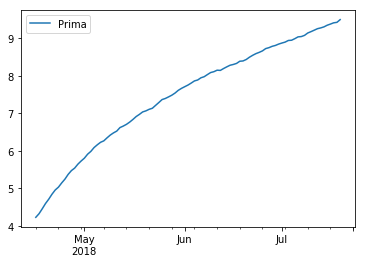

In [105]:
strike = pd.DataFrame(K*np.ones(ndays*nscen).reshape((ndays,nscen)), index=dates)
put_hist = pd.DataFrame({'Prima':np.exp(-r*ndays)*np.fmax(strike-sim_closes_hist,np.zeros(ndays*nscen).reshape((ndays,nscen))).T.mean()}, index=dates)
put_hist.plot();

In [106]:
put_hist.iloc[-1]

Prima    9.495
Name: 2018-07-19 00:00:00, dtype: float64

In [107]:
confianza = 0.95
sigma_est = sim_closes_hist.iloc[-1].sem()
mean_est = put_hist.iloc[-1].Prima
i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i1)
print(i1)

(9.064305098878885, 9.925844403213565)
(9.064305098878885, 9.925844403213565)


# Conclusiones:

Checando la base de datos de Yahoo Finance podemos darnos cuenta que los precios de los puts simulados a un menor tiempo son mucho más precisos que los que son a un plazo más largo. Nos damos cuenta claramente, ya que el precio del put para julio ronda los 9 USD, igual que en la simulación, mientras que el precios de los puts para noviembre su precio real ronda los 14 USD, lo cual nos dice que tanto el método de montecarlo como el de histogramas de valoración de opciones son más efectivos a corto plazo.